#Getting data

In [ ]:
!wget http://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
#http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar


--2022-01-04 10:48:05--  http://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar [following]
--2022-01-04 10:48:05--  https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/octet-stream]
Saving to: ‘VOCtrainval_11-May-2012.tar’

VOCtrainval_11-May- 100%[===================>]   1.86G  61.2MB/s    in 31s     

2022-01-04 10:48:37 (61.2 MB/s) - ‘VOCtrainval_11-May-2012.tar’ saved [1999639040/1999639040]



In [ ]:
import os
print(os.listdir())


['.config', 'VOCtrainval_11-May-2012.tar', 'VOCdevkit', 'sample_data']


In [ ]:
!tar -xvf "VOCtrainval_11-May-2012.tar"


In [ ]:
import os
print(os.listdir('VOCdevkit/VOC2012/'))


In [ ]:
Train_Path = "./VOCdevkit/VOC2012/JPEGImages/"
Segmentation_Path='./VOCdevkit/VOC2012/SegmentationClass/'

import cv2
import matplotlib.pyplot as plt


img = cv2.imread(Train_Path+"2011_003121.jpg")

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


plt.imshow(img)
#plt.axis("off")
plt.show()

<class 'numpy.ndarray'>
192


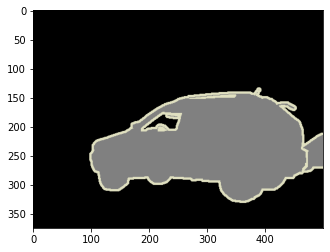

In [ ]:
img1 = cv2.imread(Segmentation_Path+"2011_003121.png")

img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
print(type(img1[310,400]))
print(img1[310,400][2])
plt.imshow(img1)
plt.axis("on")
plt.show()


In [ ]:

Annotations_Path='./VOCdevkit/VOC2012/Annotations/'
#os.listdir(Annotations_Path)
# import xml.etree.ElementTree as ET
# tree = ET.parse(Annotations_Path+'2009_004983.xml')  #dataset.xml is the name of my file
# root = tree.getroot()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

#Preprocessing data

In [ ]:
from keras.applications.vgg16 import preprocess_input
def preprocess_img(img):
    img = image.load_img(img,target_size=(224,224))
    img = image.img_to_array(img)
    img = img.astype('float')
    #img /= 255.0
    img=preprocess_input(img)

    return img

In [ ]:
def convert_annotation_to_label(annotation, y_size, x_size, num_classes=3):

    # annotation_to_label = np.zeros((y_size, x_size))

    # for i in range(y_size):
    #     for j in range(x_size):
    #         pix_value = annotation[i, j]
    #         if pix_value==np.array[0 ,0, 0]:
    #           annotation_to_label[i,j] = 0  # background
    #         elif pix_value ==np.array[224,224,192]:
    #           annotation_to_label[i,j] = 1   # outline
    #         else:
    #           annotation_to_label[i,j] = 2   # foreground
    annotation_to_label = np.zeros((y_size, x_size,num_classes))
    for i in range(y_size):
        for j in range(x_size):
            pix_value = annotation[i, j]
            if pix_value[0]==0 and pix_value[1]==0 and pix_value[2]==0:
              annotation_to_label[i,j,0] = 1  # background
            elif pix_value[0]==224 and pix_value[1]==224 and pix_value[2]==192:
              annotation_to_label[i,j,1] = 1   # outline
            else:
              annotation_to_label[i,j,2] = 1   # foreground


    return annotation_to_label

def read_annotation(dataset_folder, filename, y_size, x_size):

    fpath = os.path.join(dataset_folder, filename)
    annotation = image.load_img(fpath)

    annotation = annotation.resize((x_size, y_size))

#    annotation = annotation.convert('L')

    annotation = np.array(annotation)
    annotation[annotation == 255.] = 0.

    return annotation

In [ ]:
def get_full_dataset():


    dataset_images = []
    dataset_labels = []
    for img_path in os.listdir(Train_Path)[:int(len(os.listdir(Train_Path))*0.1)]:
        print(img_path)
        y_size = 224
        x_size = 224





        if img_path[:-3]+'png' in os.listdir(Segmentation_Path):
          annotation = read_annotation(Segmentation_Path, img_path[:-3]+'png', y_size, x_size)
          annotation_one_hot = convert_annotation_to_label(annotation, y_size, x_size, num_classes = 3)



          image = preprocess_img(Train_Path + img_path)

          dataset_images.append(image)
          dataset_labels.append(annotation_one_hot)


    dataset_images = np.asarray(dataset_images)
    dataset_labels = np.asarray(dataset_labels)

    return dataset_images, dataset_labels


In [ ]:
data = get_full_dataset()



In [ ]:
print(type(data[0]))

<class 'numpy.ndarray'>


In [ ]:
print(data[0])
print(data[1])

In [ ]:
x = '2010_002995.png' in os.listdir(Segmentation_Path)
print(x)

False


In [ ]:
print(os.listdir(Segmentation_Path))

['2009_002732.png', '2007_000713.png', '2011_001624.png', '2010_004795.png', '2009_004790.png', '2009_002568.png', '2010_003680.png', '2008_000992.png', '2011_000512.png', '2008_002467.png', '2010_004960.png', '2009_002872.png', '2011_001793.png', '2011_001135.png', '2008_001283.png', '2010_005064.png', '2009_003361.png', '2008_003774.png', '2010_001422.png', '2007_006605.png', '2007_001733.png', '2010_002701.png', '2011_000594.png', '2009_004455.png', '2009_001607.png', '2011_000479.png', '2007_008543.png', '2011_001726.png', '2010_005206.png', '2011_000874.png', '2008_002588.png', '2008_008550.png', '2011_002509.png', '2007_004291.png', '2009_000318.png', '2009_000892.png', '2011_002075.png', '2008_001761.png', '2008_003886.png', '2007_000504.png', '2008_000239.png', '2007_009901.png', '2009_002285.png', '2007_003000.png', '2009_002662.png', '2010_005187.png', '2009_003904.png', '2009_003756.png', '2008_000290.png', '2008_004399.png', '2011_003030.png', '2010_004499.png', '2009_00381

In [ ]:
data[0].shape

(288, 224, 224, 3)

In [ ]:
data[1].shape


(288, 224, 224, 3)

#Model architecture

In [ ]:
def build_model(input_layer, start_neurons):
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(input_layer)
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)
    pool1 = Dropout(0.25)(pool1)

    conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(pool1)
    conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)
    pool2 = Dropout(0.5)(pool2)

    conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(pool2)
    conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)
    pool3 = Dropout(0.5)(pool3)

    conv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(pool3)
    conv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)
    pool4 = Dropout(0.5)(pool4)

    # Middle
    convm = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(pool4)
    convm = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(convm)

    deconv4 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(convm)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = Dropout(0.5)(uconv4)
    uconv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(uconv4)
    uconv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(uconv4)

    deconv3 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(uconv4)
    uconv3 = concatenate([deconv3, conv3])
    uconv3 = Dropout(0.5)(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)

    deconv2 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv3)
    uconv2 = concatenate([deconv2, conv2])
    uconv2 = Dropout(0.5)(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)

    deconv1 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv2)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = Dropout(0.5)(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)

    output_layer = Conv2D(3, (1,1), padding="same", activation="sigmoid")(uconv1)

    return output_layer
img_size_target=224
input_layer = Input((img_size_target, img_size_target, 3))
output_layer = build_model(input_layer, 16)

Loss function

In [ ]:
def soft_dice_loss(y_true, y_pred, epsilon=1e-6):


    # skip the batch and class axis for calculating Dice score
    axes = tuple(range(1, len(y_pred.shape)-1))
    numerator = 2. * np.sum(y_pred * y_true, axes)
    denominator = np.sum(np.square(y_pred) + np.square(y_true), axes)

    return 1 - np.mean((numerator + epsilon) / (denominator + epsilon)) # average over classes and batch


In [ ]:
# model = Model(inputs=input_layer, outputs=output_layer)
# model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
# model = Model(inputs=input_layer, outputs=output_layer)
# model.compile(optimizer='adam',loss=soft_dice_loss,metrics=['accuracy'])
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 224, 224, 16  448         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 224, 224, 16  2320        ['conv2d_19[0][0]']              
                                )                                                          

#Model training

In [ ]:
model.fit(data[0],data[1],steps_per_epoch=8,epochs=10,validation_split=0.2)

Epoch 1/10
8/8 [==============================] - 63s 2s/step - loss: 4.3269 - accuracy: 0.5014 - val_loss: 1.5229 - val_accuracy: 0.6303
Epoch 2/10
8/8 [==============================] - 5s 578ms/step - loss: 1.3123 - accuracy: 0.5691 - val_loss: 0.9214 - val_accuracy: 0.6156
Epoch 3/10
8/8 [==============================] - 5s 570ms/step - loss: 0.9142 - accuracy: 0.6189 - val_loss: 1.0020 - val_accuracy: 0.6404
Epoch 4/10
8/8 [==============================] - 4s 569ms/step - loss: 0.8140 - accuracy: 0.6743 - val_loss: 0.8795 - val_accuracy: 0.6416
Epoch 5/10
8/8 [==============================] - 4s 566ms/step - loss: 0.7610 - accuracy: 0.6713 - val_loss: 0.8062 - val_accuracy: 0.6425
Epoch 6/10
8/8 [==============================] - 4s 567ms/step - loss: 0.7327 - accuracy: 0.6789 - val_loss: 0.7939 - val_accuracy: 0.6443
Epoch 7/10
8/8 [==============================] - 4s 563ms/step - loss: 0.7172 - accuracy: 0.6927 - val_loss: 0.7781 - val_accuracy: 0.6452
Epoch 8/10
8/8 [======

In [ ]:
#  img_arr=[]
#  seg_arr=[]
#  for img_path in os.listdir(Train_Path)[:int(len(os.listdir(Train_Path))*0.1)]:

#     try:
#       img = (preprocess_img(Train_Path + img_path))
#       img_arr.append(img)
#       print(img)
#       seg = np.array(preprocess_img(Segmentation_Path + img_path[:-3]+'png'))
#       seg_arr.append(seg)
#       print(seg)
#     except:
#       continue

# train_datagen = image.ImageDataGenerator(
#     featurewise_center=True, samplewise_center=True,
#     featurewise_std_normalization=False, samplewise_std_normalization=True,
#     rescale = 1./255,
#     zoom_range=0.2,
#     preprocessing_function=True,
# )
# we create two instances with the same arguments
# from keras.preprocessing.image import ImageDataGenerator
# data_gen_args = dict(featurewise_center=False,
#                      featurewise_std_normalization=False,
#                      #reshape =
#                      rescale = 1./255,
#                      rotation_range=90,
#                      width_shift_range=0.1,
#                      height_shift_range=0.1,
#                      zoom_range=0.2)
# image_datagen = ImageDataGenerator(**data_gen_args)
# mask_datagen = ImageDataGenerator(**data_gen_args)
# # Provide the same seed and keyword arguments to the fit and flow methods
# seed = 1
# # image_datagen.fit(images, augment=True, seed=seed)
# # mask_datagen.fit(masks, augment=True, seed=seed)
# image_generator = image_datagen.flow_from_directory(
#     Train_Path,
#     class_mode=None,
#     seed=seed)
# mask_generator = mask_datagen.flow_from_directory(
#     Segmentation_Path,
#     class_mode=None,
#     seed=seed)
# # combine generators into one which yields image and masks
# train_generator = zip(image_generator, mask_generator)
# model.fit(
#     train_generator,
#     steps_per_epoch=200,
#     epochs=10)

In [ ]:
# def data_generator(batch_size=30):
#   Xtrain=[]
#   img_arr =[]
#   seg_arr =[]
#   total = len(os.listdir(Train_Path))
#   n=0


#   for img_path in os.listdir(Train_Path)[:int(total*0.5)]:

#     try:
#       img = (preprocess_img(Train_Path + img_path))
#       img_arr.append(img)
#       seg = np.array(preprocess_img(Segmentation_Path + img_path[:-3]+".png"))
#       seg_arr.append(seg)
#       #Xtrain=preprocess_input(np.array([np.array(img_arr),np.array(seg_arr)]))
#       n+=1
#     except:
#       continue



#     if n==batch_size:

#                     #print([np.array(img_arr),np.array(seg_arr)].shape)
#                     yield (np.array(img_arr),np.array(seg_arr))
#                     img_arr=[]
#                     seg_arr=[]
#                     n = 0




In [ ]:
# for i in range(1500):
#   if os.listdir(Segmentation_Path)[i] ==os.listdir(Train_Path)[i]:
#     print(os.listdir(Segmentation_Path)[i])

In [ ]:
# print(os.listdir(Segmentation_Path))

['2009_000029.png', '2010_005217.png', '2011_001082.png', '2010_004669.png', '2008_001404.png', '2008_002240.png', '2011_002244.png', '2010_001367.png', '2009_000998.png', '2007_002668.png', '2008_005345.png', '2011_002385.png', '2010_004283.png', '2007_009832.png', '2009_001270.png', '2008_002960.png', '2011_002851.png', '2008_000361.png', '2008_004321.png', '2010_005644.png', '2010_003060.png', '2007_009295.png', '2009_000505.png', '2008_003060.png', '2007_005314.png', '2011_001530.png', '2008_006108.png', '2010_002030.png', '2008_000316.png', '2011_000768.png', '2010_003325.png', '2008_001640.png', '2009_001391.png', '2008_005262.png', '2009_003607.png', '2010_002937.png', '2007_002281.png', '2008_003913.png', '2009_000354.png', '2010_000117.png', '2007_007947.png', '2010_001852.png', '2007_000738.png', '2010_003899.png', '2007_003957.png', '2008_006345.png', '2008_006752.png', '2010_003409.png', '2010_003239.png', '2010_004683.png', '2007_005803.png', '2009_002165.png', '2007_00893

In [ ]:

# Xtrain=[]
# img_arr =[]
# seg_arr =[]
# total = len(os.listdir(Train_Path))



# for img_path in os.listdir(Train_Path)[int(total*0.1):int(total*0.2)]:



#    if img_path[:-3]+'png' in os.listdir(Segmentation_Path):

#      img = (preprocess_img(Train_Path + img_path))
#      img_arr.append(img)
#      #img_arr=np.array(img_arr)


#      seg = (preprocess_img(Segmentation_Path + img_path[:-4]+".png"))
#      seg_arr.append(seg)
#      #seg_arr=np.array(seg_arr)

#      #print(seg.shape,seg_arr.shape)

# img_arr=np.array(img_arr)
# seg_arr=np.array(seg_arr)








In [ ]:
# model.fit(img_arr,seg_arr,validation_split=0.2,epochs=10)

In [ ]:
# def val_generator():

#   batch_size=12
#   img_arr =[]
#   seg_arr =[]
#   total = len(os.listdir(Train_Path))
#   n=0


#   for img_path in os.listdir(Train_Path)[int(total*0.5):int(total*0.7)]:

#     try:
#       img = (preprocess_img(Train_Path + img_path))
#       img_arr.append(img)
#       seg = np.array(preprocess_img(Segmentation_Path + img_path[:-3]+'png'))
#       seg_arr.append(seg)
#       n+=1
#     except:
#       continue


#   #return [np.array(img_arr),np.array(seg_arr)]
#     if n==batch_size:
#                     yield (np.array(img_arr),np.array(seg_arr))

#                     img_arr=[]
#                     seg_arr=[]
#                     n = 0



In [ ]:
def soft_dice_loss(y_true, y_pred, epsilon=1e-6):


    # skip the batch and class axis for calculating Dice score
    axes = tuple(range(1, len(y_pred.shape)-1))
    numerator = 2. * np.sum(y_pred * y_true, axes)
    denominator = np.sum(np.square(y_pred) + np.square(y_true), axes)

    return 1 - np.mean((numerator + epsilon) / (denominator + epsilon)) # average over classes and batch
